In [42]:
words=open('names.txt','r').read().splitlines()
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [43]:
len(words)

32033

In [44]:
min(len(w) for w in words)

2

In [45]:
max(len(w) for w in words)

15

#### Look at bigram (art arda iki kelime demek)

In [46]:
b={}
for w in words:
    chs=['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1


In [47]:
sorted(b.items(),key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [48]:
import torch

In [49]:
N=torch.zeros(27,27,dtype=torch.int32)

In [50]:
chars=(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
print(stoi)


itos={s:i for i,s in stoi.items()}
print(itos)


{'c': 1, 'q': 2, 'a': 3, 'g': 4, 'd': 5, 'v': 6, 'b': 7, 's': 8, 'y': 9, 'z': 10, 'x': 11, 'p': 12, 'm': 13, 'w': 14, 'u': 15, 'h': 16, 'l': 17, 'n': 18, 'f': 19, 'e': 20, 'o': 21, 't': 22, 'i': 23, 'r': 24, 'j': 25, 'k': 26, '.': 0}
{1: 'c', 2: 'q', 3: 'a', 4: 'g', 5: 'd', 6: 'v', 7: 'b', 8: 's', 9: 'y', 10: 'z', 11: 'x', 12: 'p', 13: 'm', 14: 'w', 15: 'u', 16: 'h', 17: 'l', 18: 'n', 19: 'f', 20: 'e', 21: 'o', 22: 't', 23: 'i', 24: 'r', 25: 'j', 26: 'k', 0: '.'}


In [51]:
for w in words:
    chs=['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
      



In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

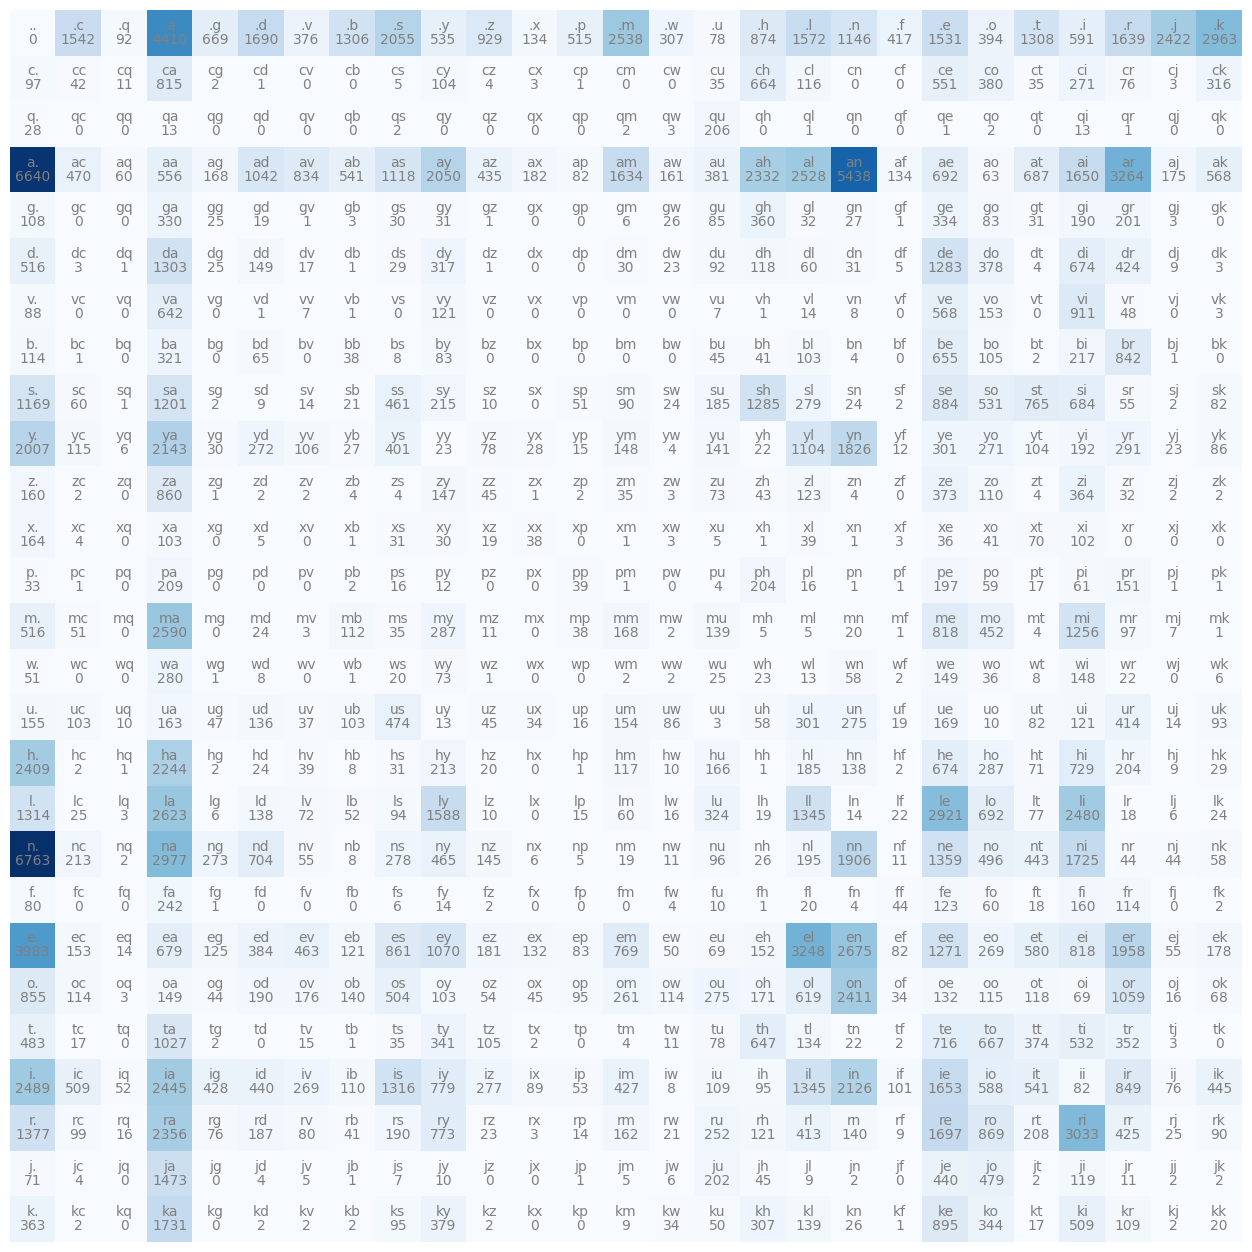

In [53]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')

plt.axis('off')

In [54]:
N[0]

tensor([   0, 1542,   92, 4410,  669, 1690,  376, 1306, 2055,  535,  929,  134,
         515, 2538,  307,   78,  874, 1572, 1146,  417, 1531,  394, 1308,  591,
        1639, 2422, 2963], dtype=torch.int32)

In [55]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.0481, 0.0029, 0.1377, 0.0209, 0.0528, 0.0117, 0.0408, 0.0642,
        0.0167, 0.0290, 0.0042, 0.0161, 0.0792, 0.0096, 0.0024, 0.0273, 0.0491,
        0.0358, 0.0130, 0.0478, 0.0123, 0.0408, 0.0184, 0.0512, 0.0756, 0.0925])

In [71]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

# Sonraki harf için döngü yapalım


'a'

### Multinomial olasılık dağılımı örneği

In [57]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [58]:
# p nin olasılık dağılımına göre çıktı verir
samples=torch.multinomial(p,num_samples=100,replacement=True,generator=g)
samples

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [59]:
def count_values_simple(tensor):
    # Benzersiz değerler ve frekanslarını almak için torch.bincount kullanımı
    counts = torch.bincount(tensor)
    value_counts = {i: counts[i] for i in range(len(counts))}
    return value_counts


value_counts = count_values_simple(samples)
print(value_counts)

{0: tensor(61), 1: tensor(33), 2: tensor(6)}


In [60]:
p.shape

torch.Size([3])

In [61]:
#  Olasılık matrisini hazırlamak istiyorum sürekli hesaplama yapmamak için

P=(N+1).float()
P=P/P.sum(1,keepdim=True)

In [62]:
P.shape

torch.Size([27, 27])

In [63]:
P.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [64]:
P[0].sum()

tensor(1.)

In [72]:
g=torch.Generator().manual_seed(2147483647)

for i in range(5):
    out=[]
    ix=0
    while True:
        #p=N[ix].float()
        #p=p/p.sum()
        p=P[ix]
        #p=torch.ones(27)/27.0 tamamen eğitimsiz model çıktısıdır ama bizimki ise
        # sadece bigramlarda eğitimlidir bu yüzden isme benzer şeyler üretiyor
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break

    print(''.join(out))

adran.
kamelon.
yalarersian.
kyazeen.
anexiox.


### Loss-Function


In [68]:
log_likelihood=0.0
n=0
for w in words:
    chs=['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        #print(f'{ch1}{ch2}','----',f'{ix1}-{ix2}','-----Prob:'f'{prob:4f}','----LogProb:',f'{logprob}')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


### Test Model

In [67]:
log_likelihood=0.0
n=0
for w in ['andrejq']:
    chs=['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        #print(f'{ch1}{ch2}','----',f'{ix1}-{ix2}','-----Prob:'f'{prob:4f}','----LogProb:',f'{logprob}')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
nll/n=tensor(3.4834)
